In [51]:
%load_ext autoreload
%autoreload 2

import torch

from data.generation import SpiralRotation, Patches
from visualization_utils.spheres import visualize_spheres_side_by_side, scatter3d_sphere

from encoders import get_mlp

import matplotlib.pyplot as plt
from simclr.simclr import SimCLR
from spaces import NSphereSpace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


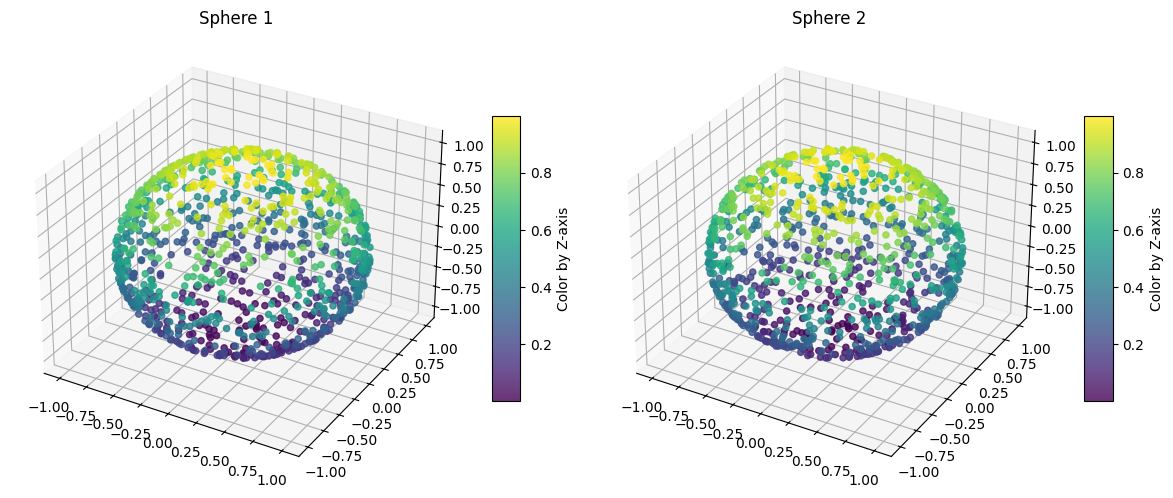

In [49]:
sphere = NSphereSpace(3)
g = SpiralRotation(2)

z = sphere.uniform(1000)

visualize_spheres_side_by_side(plt, z, g(z))

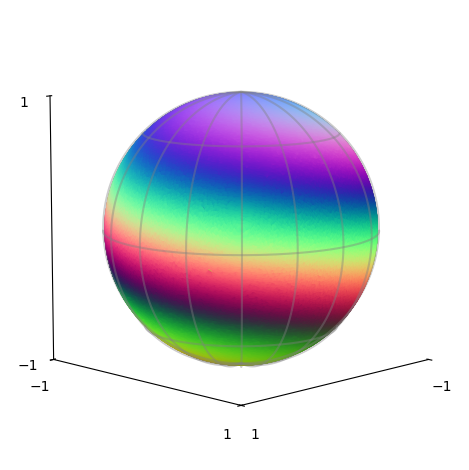

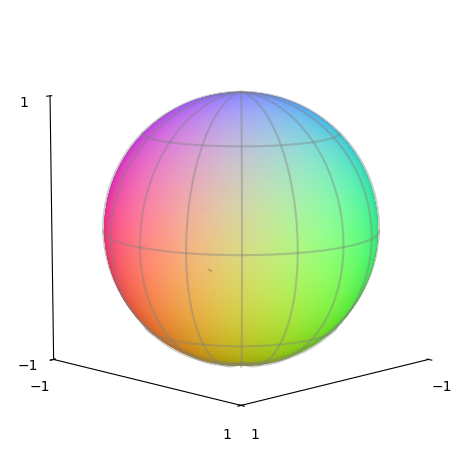

In [50]:
# Seeing the effect of 
z = sphere.uniform(100000)
fig = scatter3d_sphere(plt, z, g(z), s=10, a=.8)
fig = scatter3d_sphere(plt, z, z, s=10, a=.8)

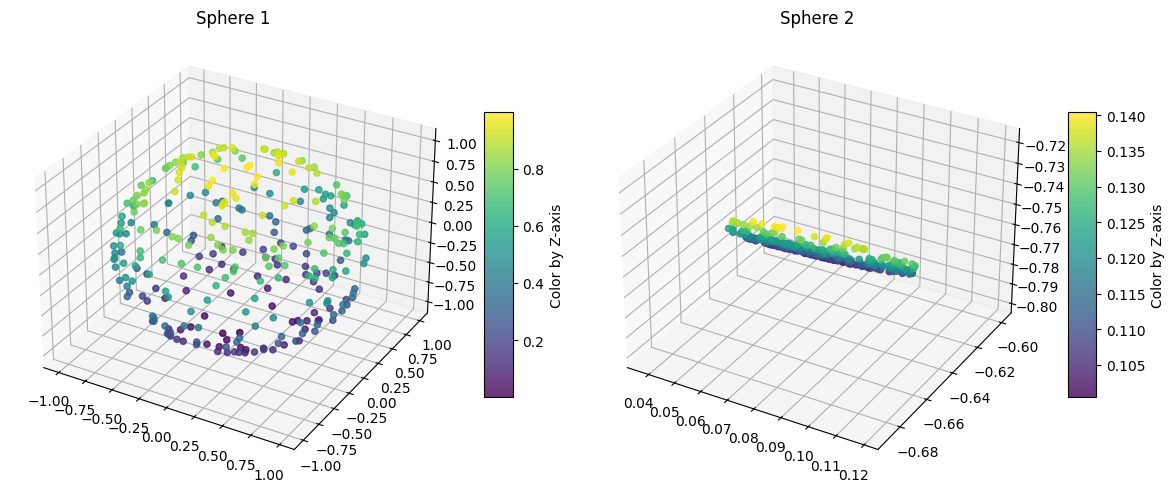

In [42]:
kappa = tau = 10
normal_concentration_param = 0.1 # Default in Zimmerman's code

iterations = 3000
batch = 6144

sample_pair_fixed = lambda batch: sphere.sample_pair_vmf(batch, kappa)
sample_uniform_fixed = lambda batch: sphere.uniform(batch)

# Initialize the multi-layer perceptron used for encoding
f = get_mlp(
    n_in=3,
    n_out=3,
    layers=[
        3 * 10,
        3 * 50,
        3 * 50,
        3 * 50,
        3 * 50,
        3 * 10,
    ],
    output_normalization="fixed_sphere",
).to("cpu")

h = lambda z: f(g(z))

z = sphere.uniform(300)
z_enc = h(z)

# Add coloring corresponding to initial points

visualize_spheres_side_by_side(plt, z, z_enc)

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.72330379486084 Samples processed: 1 linear disentanglement: 0.21198725700378418 permutation disentanglement: 0.00024483600282110274
Loss: 8.647647857666016 Samples processed: 251 linear disentanglement: 0.39848318696022034 permutation disentanglement: 0.2811172902584076
Loss: 8.647896766662598 Samples processed: 501 linear disentanglement: 0.4498220384120941 permutation disentanglement: 0.27120333909988403
Loss: 8.642756462097168 Samples processed: 751 linear disentanglement: 0.5696038603782654 permutation disentanglement: 0.38769641518592834
Loss: 8.638687133789062 Samples processed: 1001 linear disentanglement: 0.8605243563652039 permutation disentanglement: 0.3748222887516022
Loss: 8.635623931884766 Samples processed: 1251 linear disentanglement: 0.9963793754577637 permutation disentanglement: 0.26237350702285767
Loss: 8.635261535644531 Samples processed: 1501 linear disentanglement: 0.9972514510154724 permutation dise

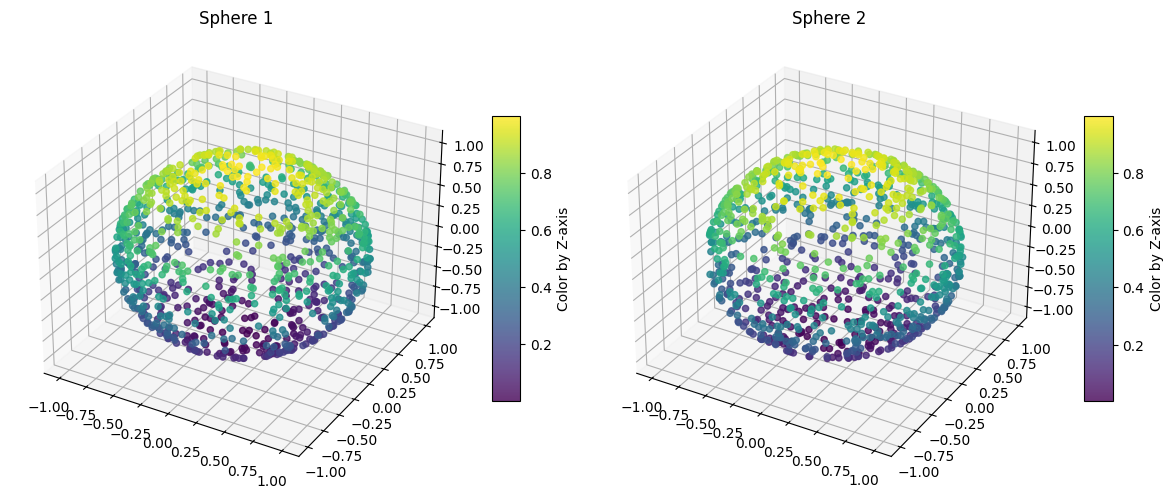

In [43]:
simclr_vmf = SimCLR(
    f, g, sample_pair_fixed, sample_uniform_fixed, tau
)

f = simclr_vmf.train(batch, iterations)

z = sphere.uniform(1000)
z_enc = h(z)

visualize_spheres_side_by_side(plt, z, z_enc)

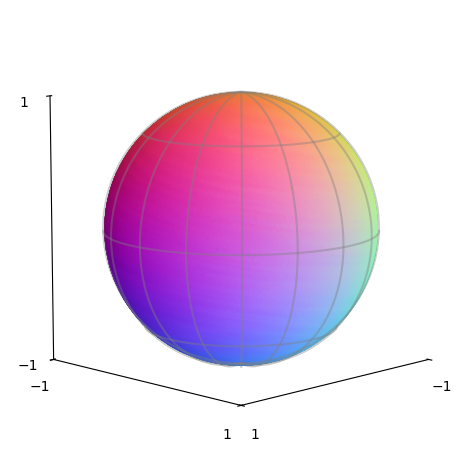

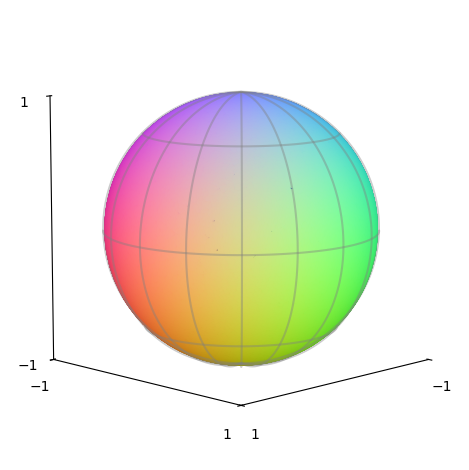

In [46]:
z = sphere.uniform(100000)
z_enc = h(z)

fig = scatter3d_sphere(plt, z, z_enc, s=10, a=.8)
fig = scatter3d_sphere(plt, z, z, s=10,a=0.8)

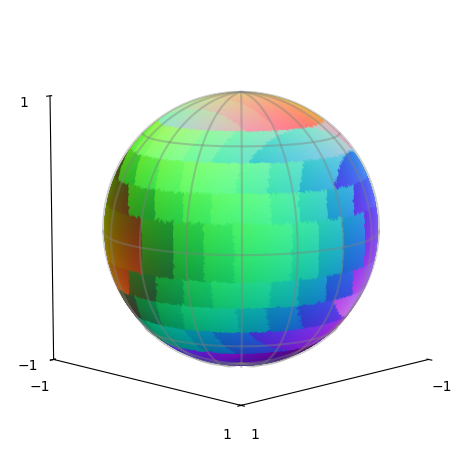

In [57]:
g_patches = Patches(5)

z = sphere.uniform(100000)
fig = scatter3d_sphere(plt, z, g_patch(z), s=10, a=.8)

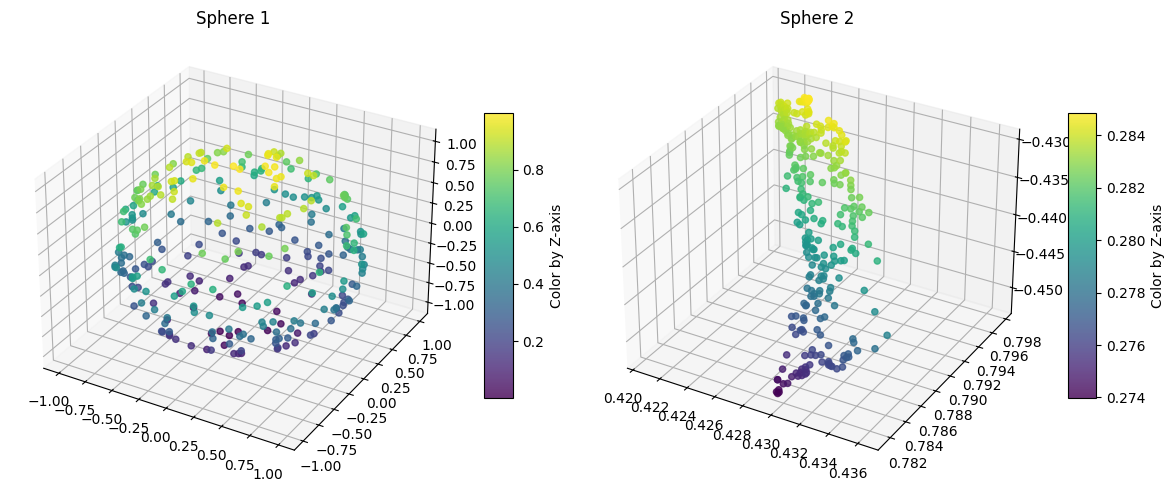

In [61]:
# Initialize the multi-layer perceptron used for encoding
f_patches = get_mlp(
    n_in=3,
    n_out=3,
    layers=[
        3 * 10,
        3 * 50,
        3 * 50,
        3 * 50,
        3 * 50,
        3 * 10,
    ],
    output_normalization="fixed_sphere",
).to("cpu")

h_patches = lambda z: f_patches(g_patches(z))

z = sphere.uniform(300)
z_enc = h_patches(z)

visualize_spheres_side_by_side(plt, z, z_enc)

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.72338581085205 Samples processed: 1 linear disentanglement: 0.3010547459125519 permutation disentanglement: 0.0001127918585552834
Loss: 8.650151252746582 Samples processed: 251 linear disentanglement: 0.5311682820320129 permutation disentanglement: 0.43236228823661804
Loss: 8.64045238494873 Samples processed: 501 linear disentanglement: 0.868945300579071 permutation disentanglement: 0.5162050127983093
Loss: 8.639126777648926 Samples processed: 751 linear disentanglement: 0.9411558508872986 permutation disentanglement: 0.4479764699935913
Loss: 8.638243675231934 Samples processed: 1001 linear disentanglement: 0.951300323009491 permutation disentanglement: 0.4406885802745819
Loss: 8.637995719909668 Samples processed: 1251 linear disentanglement: 0.9574126601219177 permutation disentanglement: 0.4341515600681305
Loss: 8.63805103302002 Samples processed: 1501 linear disentanglement: 0.9607541561126709 permutation disentangleme

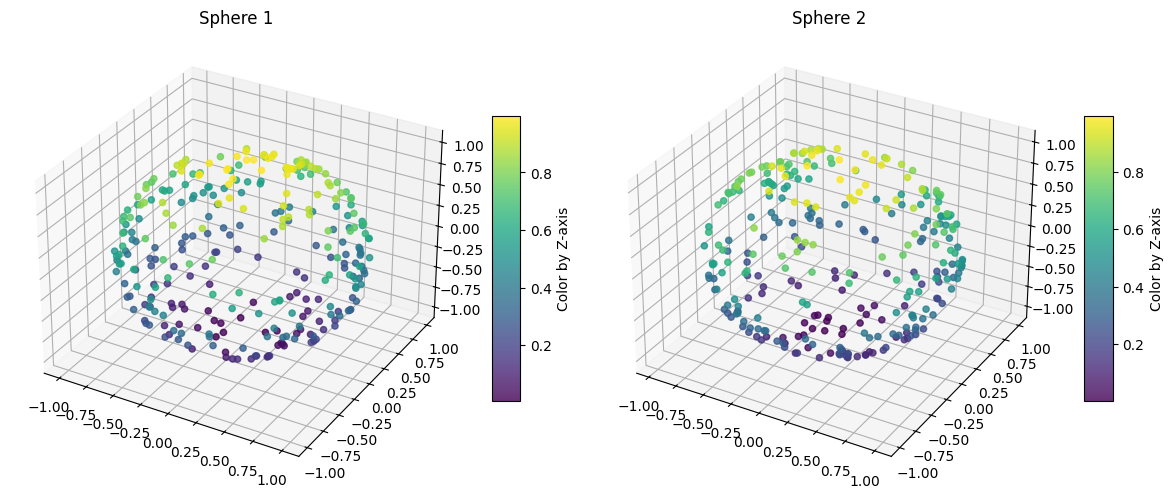

In [62]:
simclr_patches_vmf = SimCLR(
    f_patches, g_patches, sample_pair_fixed, sample_uniform_fixed, tau
)

f_patches = simclr_patches_vmf.train(batch, iterations)

z = sphere.uniform(300)
z_enc = h_patches(z)

visualize_spheres_side_by_side(plt, z, z_enc)

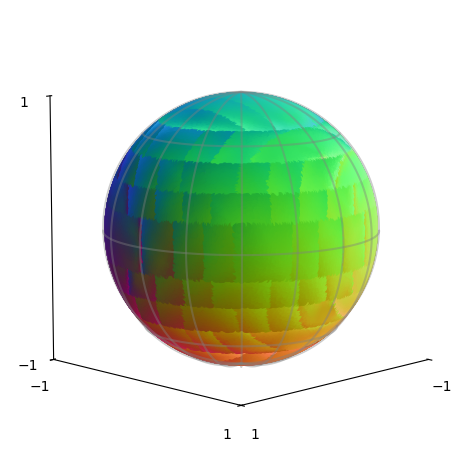

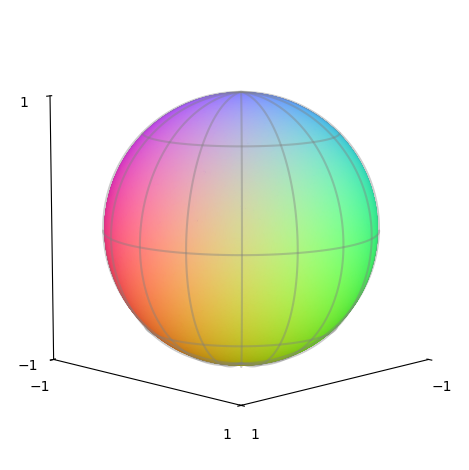

In [63]:
z = sphere.uniform(100000)
z_enc = h_patches(z)

fig = scatter3d_sphere(plt, z, z_enc, s=10, a=.8)
fig = scatter3d_sphere(plt, z, z, s=10,a=0.8)